In [55]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [6]:
#dataset
df= pd.read_csv('./dataset/heart_disease.csv')
df.drop('education', inplace=True, axis= 1)
df.rename(columns={'male': 'sex_male'}, inplace= True)

In [9]:
df.isna().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
#replace Na values with mean of column
for col in df.columns:
    df[col]= df[col].fillna(df[col].mean())
df.isna().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
print(df.head() ,'\n'+'-'*100+ '\n' , df.shape, '\n'+'-'*100)
print(df.TenYearCHD.value_counts())

   sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [24]:
x= df.drop('TenYearCHD', axis= 1)
y= df['TenYearCHD']
x_scaled= StandardScaler().fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test= train_test_split(x, y, 
                                                   test_size= 0.3, random_state= 40)
print('Train set shape: ', x_train.shape, y_train.shape)
print('Test set shape: ', x_test.shape, y_test.shape)

Train set shape:  (2968, 14) (2968,)
Test set shape:  (1272, 14) (1272,)


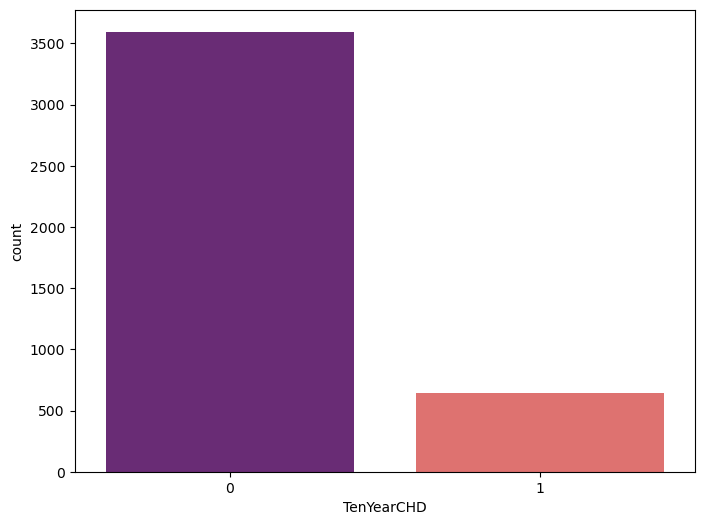

In [38]:
plt.figure(figsize= (8, 6))
sns.countplot(x= 'TenYearCHD',data= df, palette= 'magma')
plt.show()

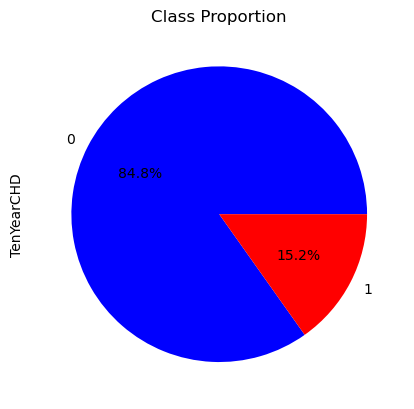

In [45]:
df['TenYearCHD'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Class Proportion')
plt.show()

Accuracy Score for LogisticRegression in training set    : 0.8527628032345014
Accuracy Score for LogisticRegression in test set    : 0.8663522012578616


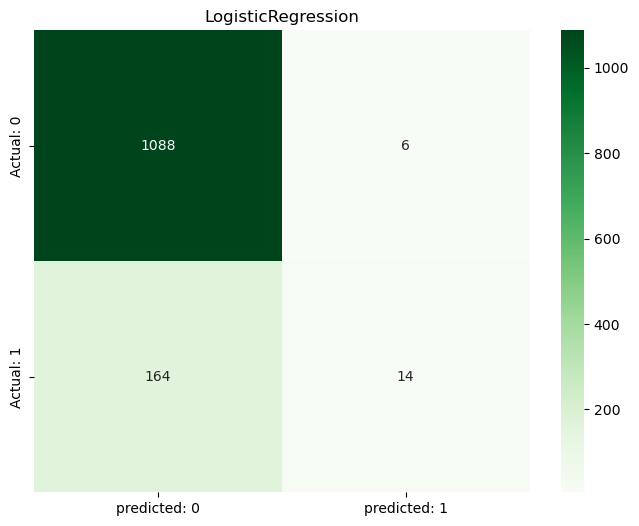

Accuracy Score for LogisticRegressionCV in training set    : 0.852088948787062
Accuracy Score for LogisticRegressionCV in test set    : 0.8671383647798742


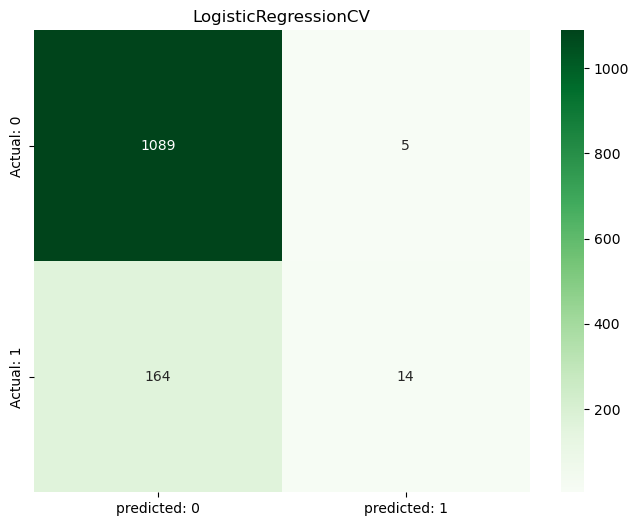

In [60]:
models=[LogisticRegression(max_iter=10000), LogisticRegressionCV(max_iter=10000)]
for model in models:
    model.fit(x_train, y_train)
    y_pred= model.predict(x_train)
    y_pred_test= model.predict(x_test)
    print(f'Accuracy Score for {model.__class__.__name__} in training set\
    : {accuracy_score(y_train, y_pred)}')
    print(f'Accuracy Score for {model.__class__.__name__} in test set\
    : {accuracy_score(y_test, y_pred_test)}')
    cm= confusion_matrix(y_test ,y_pred_test)
    conf_matrix= pd.DataFrame(data= cm, 
                              columns= ['predicted: 0', 'predicted: 1'],
                              index= ['Actual: 0', 'Actual: 1'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot= True, fmt= 'd', cmap='Greens')
    plt.title(f'{model.__class__.__name__}')
    plt.show()